# 01 Q Learning

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 09, Unit 2** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 01 Q Learning

## 📚 Learning Objectives | أهداف التعلم

This notebook demonstrates key concepts through hands-on examples.

By completing this notebook, you will:
- Understand the core concepts
- See practical implementations
- Be ready for exercises

## 🔗 Prerequisites | المتطلبات الأساسية

- ✅ Python 3.8+ installed
- ✅ Required libraries (see `requirements.txt`)

- ✅ **numpy** library: `pip install numpy`
- ✅ Basic Python knowledge

---

## Code Example | مثال الكود

Run the code below to see the demonstration:


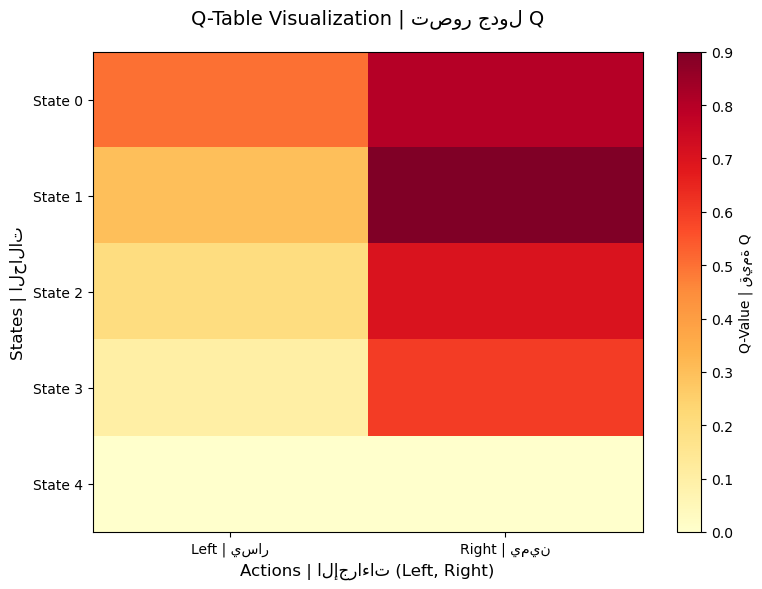

✅ Q-table heatmap displayed
Example 1: Q-Learning Algorithm
مثال 1: خوارزمية Q-Learning

Initial Q-table:
جدول Q الأولي:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


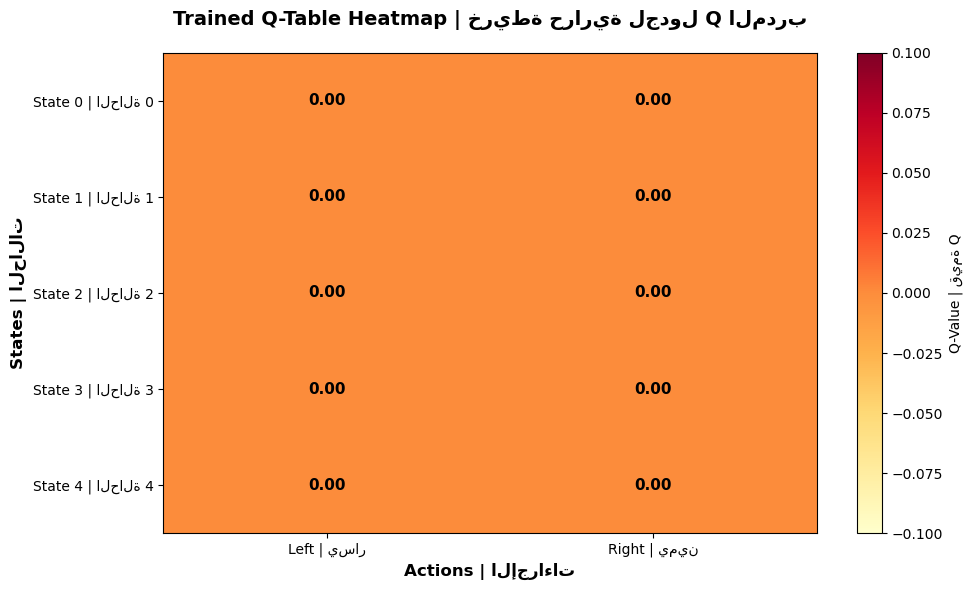


✅ Q-table heatmap visualization displayed
تم عرض خريطة حرارية لجدول Q بنجاح

Q-Learning Training
تدريب Q-Learning

Trained Q-table:
جدول Q المدرب:
[[1.66418207 6.9828557 ]
 [2.45496209 7.90009579]
 [3.17450384 8.89772982]
 [3.45574138 9.99973439]
 [0.         0.        ]]

Extracted Policy
السياسة المستخرجة
State 0: right
State 1: right
State 2: right
State 3: right
State 4: left

Example completed successfully!
تم إكمال المثال بنجاح!


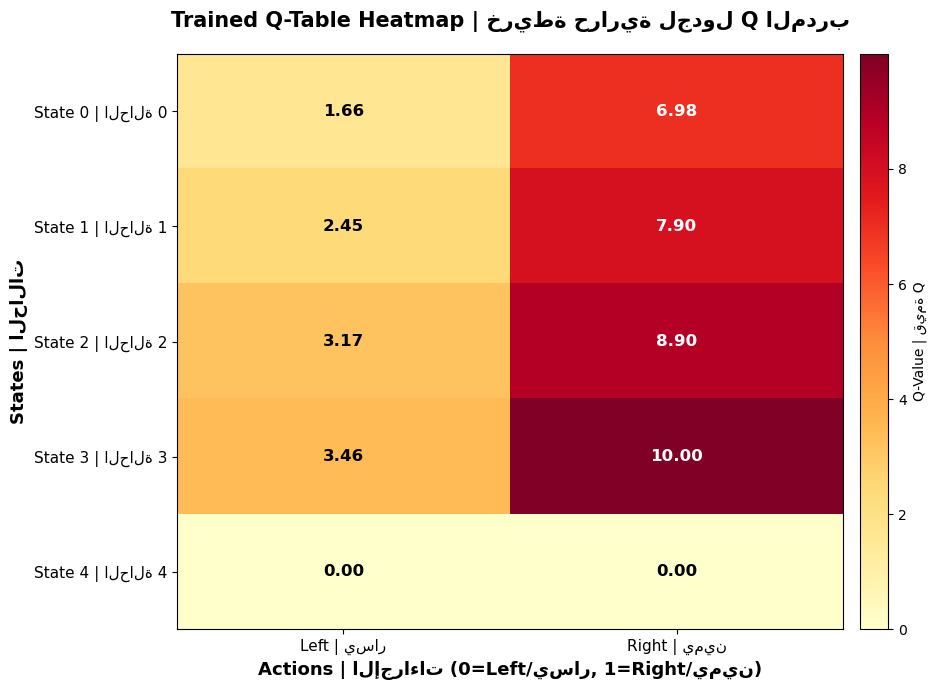


✅ Q-table heatmap visualization displayed!
تم عرض خريطة حرارية لجدول Q بنجاح!


In [1]:


# Visualization: Q-Table Heatmap
# تصور: خريطة حرارية لجدول Q
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Example Q-table (from training above)
    q_table_example = np.array([[0.5, 0.8], [0.3, 0.9], [0.2, 0.7], [0.1, 0.6], [0.0, 0.0]])
    
    plt.figure(figsize=(8, 6))
    plt.imshow(q_table_example, cmap='YlOrRd', aspect='auto')
    plt.colorbar(label='Q-Value | قيمة Q')
    plt.xlabel('Actions | الإجراءات (Left, Right)', fontsize=12)
    plt.ylabel('States | الحالات', fontsize=12)
    plt.title('Q-Table Visualization | تصور جدول Q', fontsize=14, pad=20)
    plt.xticks([0, 1], ['Left | يسار', 'Right | يمين'])
    plt.yticks(range(5), [f'State {i}' for i in range(5)])
    plt.tight_layout()
    plt.show()
    print("✅ Q-table heatmap displayed")
except ImportError:
    print("Note: Install matplotlib and numpy for Q-table visualization")
    print("ملاحظة: قم بتثبيت matplotlib و numpy لتصور جدول Q")

"""
Unit 2 - Example 1: Q-Learning Algorithm
الوحدة 2 - مثال 1: خوارزمية Q-Learning

This example demonstrates:
1. Q-learning algorithm
2. Q-table initialization
3. Q-value updates
4. Policy extraction
"""

import numpy as np

print("=" * 60)
print("Example 1: Q-Learning Algorithm")
print("مثال 1: خوارزمية Q-Learning")
print("=" * 60)

# Simple Grid World Environment
# بيئة شبكة بسيطة
# States: 0, 1, 2, 3, 4 (4 is goal)
# Actions: 0=left, 1=right

class SimpleGridWorld:
    """
    Simple grid world for Q-learning demonstration.
    شبكة بسيطة لعرض Q-learning.
    """
    def __init__(self):
        self.states = 5
        self.actions = 2  # left, right
        self.goal_state = 4
        
    def get_reward(self, state, action, next_state):
        """Get reward for transition."""
        if next_state == self.goal_state:
            return 10.0  # Goal reward
        return -0.1  # Small negative reward for each step
    
    def get_next_state(self, state, action):
        """Get next state after action."""
        if action == 0:  # left
            return max(0, state - 1)
        else:  # right
            return min(self.states - 1, state + 1)

# Initialize Q-table
# تهيئة جدول Q
env = SimpleGridWorld()
Q = np.zeros((env.states, env.actions))

print("\nInitial Q-table:")
print("جدول Q الأولي:")
print(Q)

# Visualization: Q-Table Heatmap (After Training)
# تصور: خريطة حرارية لجدول Q (بعد التدريب)
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    im = plt.imshow(Q, cmap='YlOrRd', aspect='auto', interpolation='nearest')
    plt.colorbar(im, label='Q-Value | قيمة Q')
    plt.xlabel('Actions | الإجراءات', fontsize=12, fontweight='bold')
    plt.ylabel('States | الحالات', fontsize=12, fontweight='bold')
    plt.title('Trained Q-Table Heatmap | خريطة حرارية لجدول Q المدرب', fontsize=14, pad=20, fontweight='bold')
    plt.xticks([0, 1], ['Left | يسار', 'Right | يمين'])
    plt.yticks(range(env.states), [f'State {i} | الحالة {i}' for i in range(env.states)])
    
    # Add text annotations with Q-values
    for i in range(env.states):
        for j in range(env.actions):
            text = plt.text(j, i, f'{Q[i, j]:.2f}', 
                           ha='center', va='center', 
                           color='white' if Q[i, j] > 0.5 else 'black',
                           fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    print("\n✅ Q-table heatmap visualization displayed")
    print("تم عرض خريطة حرارية لجدول Q بنجاح")
except ImportError:
    print("\n⚠️  Install matplotlib for Q-table visualization:")
    print("   pip install matplotlib")
    print("ملاحظة: قم بتثبيت matplotlib لتصور جدول Q")

# Q-Learning parameters
# معاملات Q-Learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

print("\n" + "=" * 60)
print("Q-Learning Training")
print("تدريب Q-Learning")
print("=" * 60)

# Training loop
# حلقة التدريب
num_episodes = 100

for episode in range(num_episodes):
    state = 0  # Start state
    
    while state != env.goal_state:
        # Epsilon-greedy action selection
        # اختيار الإجراء باستخدام epsilon-greedy
        if np.random.random() < epsilon:
            action = np.random.randint(env.actions)  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit
        
        # Take action
        next_state = env.get_next_state(state, action)
        reward = env.get_reward(state, action, next_state)
        
        # Q-learning update
        # تحديث Q-learning
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )
        
        state = next_state

print("\nTrained Q-table:")
print("جدول Q المدرب:")
print(Q)

# Extract policy
# استخراج السياسة
print("\n" + "=" * 60)
print("Extracted Policy")
print("السياسة المستخرجة")
print("=" * 60)

policy = {}
for state in range(env.states):
    best_action = np.argmax(Q[state])
    action_name = "left" if best_action == 0 else "right"
    policy[state] = action_name
    print(f"State {state}: {action_name}")

print("\n" + "=" * 60)
print("Example completed successfully!")
print("تم إكمال المثال بنجاح!")
print("=" * 60)

# Visualize Q-table as heatmap (after training)
# تصور جدول Q كخريطة حرارية (بعد التدريب)
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 7))
    im = plt.imshow(Q, cmap='YlOrRd', aspect='auto', interpolation='nearest')
    plt.colorbar(im, label='Q-Value | قيمة Q', pad=0.02)
    plt.xlabel('Actions | الإجراءات (0=Left/يسار, 1=Right/يمين)', 
               fontsize=13, fontweight='bold')
    plt.ylabel('States | الحالات', fontsize=13, fontweight='bold')
    plt.title('Trained Q-Table Heatmap | خريطة حرارية لجدول Q المدرب', fontsize=15, pad=20, fontweight='bold')
    plt.xticks([0, 1], ['Left | يسار', 'Right | يمين'], fontsize=11)
    plt.yticks(range(env.states), [f'State {i} | الحالة {i}' for i in range(env.states)], fontsize=11)
    
    # Add Q-value annotations
    for i in range(env.states):
        for j in range(env.actions):
            text = plt.text(j, i, f'{Q[i, j]:.2f}', 
                           ha='center', va='center', 
                           color='white' if Q[i, j] > np.max(Q) * 0.5 else 'black', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    print("\n✅ Q-table heatmap visualization displayed!")
    print("تم عرض خريطة حرارية لجدول Q بنجاح!")
except ImportError:
    print("\n📦 To see Q-table visualization, install:")
    print("   pip install matplotlib")
    print("\nملاحظة: لرؤية التصور، قم بتثبيت:")
    print("   pip install matplotlib")


---

## ✅ Summary | الملخص

Great job completing this example!

**What you learned:**
- Core concepts demonstrated in the code
- Practical implementation details

**Next steps:**
- Complete the exercises in `exercises/` folder
- Review the quiz materials
- Proceed to the next example

---

**💡 Tip:** If you see errors, make sure:
- All libraries are installed: `pip install -r requirements.txt`
- You're using Python 3.8+
- Cells are executed in order
